In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

## Média de notas dos alunos de uma escola

In [2]:
df1 = pd.read_csv('Student_performance_data _.csv')
df1

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df1.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
df_colunas = df1[['Age', 'Gender', 'Ethnicity', 'ParentalEducation','GPA']]
df_colunas

,Age,Gender,Ethnicity,ParentalEducation,GPA
0,17,1,0,2,2.929196
1,18,0,0,1,3.042915
2,15,0,2,3,0.112602
3,17,1,0,3,2.054218
4,17,1,0,2,1.288061
...,...,...,...,...,...
2387,18,1,0,3,3.455509
2388,17,0,0,1,3.279150
2389,16,1,0,2,1.142333
2390,16,1,1,0,1.803297


In [5]:
df_colunas['GPA'] = df_colunas['GPA'].round(2)
df_colunas

C:\Users\Jana\AppData\Local\Temp\ipykernel_8684\2220151043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_colunas['GPA'] = df_colunas['GPA'].round(2)


,Age,Gender,Ethnicity,ParentalEducation,GPA
0,17,1,0,2,2.93
1,18,0,0,1,3.04
2,15,0,2,3,0.11
3,17,1,0,3,2.05
4,17,1,0,2,1.29
...,...,...,...,...,...
2387,18,1,0,3,3.46
2388,17,0,0,1,3.28
2389,16,1,0,2,1.14
2390,16,1,1,0,1.80


In [6]:
media_notas = df_colunas['GPA'].mean()

In [7]:
desvio_notas = df_colunas['GPA'].std()

In [8]:
t_statistic, p_value = stats.ttest_1samp(a=df1['GPA'], popmean=media_notas)
print(t_statistic,p_value)

0.0012877131103315757 0.9989726612974702


In [9]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula. A média do GPA dos alunos é significativamente diferente da média calculada.")
else:
    print(f"Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do GPA dos alunos é diferente da média calculada ({media_notas:.2f}).")

Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a média do GPA dos alunos é diferente da média calculada (1.91).


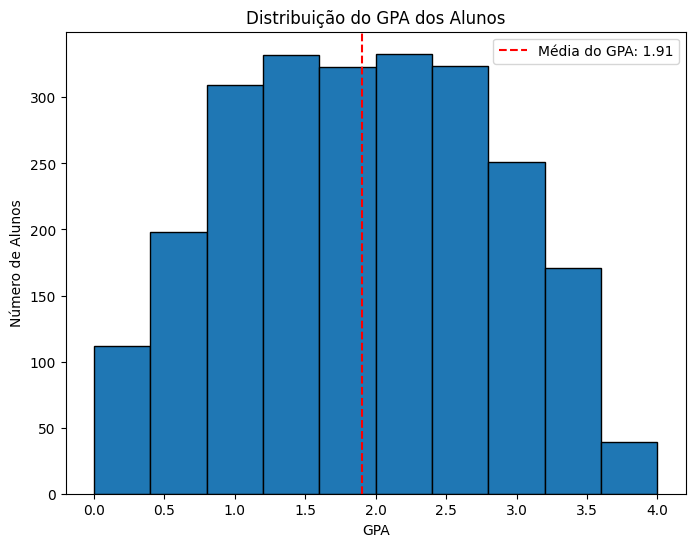

In [10]:
# Dados do teste t
t_statistic = 0.0012877131103315757
p_value = 0.9989726612974702
n = 2392  # Tamanho da amostra
plt.figure(figsize=(8, 6))
plt.hist(df1['GPA'], bins=10, edgecolor='black')  # Histograma do GPA
plt.axvline(media_notas, color='red', linestyle='--', label=f'Média do GPA: {media_notas:.2f}') # Linha vertical da média
plt.xlabel('GPA')
plt.ylabel('Número de Alunos')
plt.title('Distribuição do GPA dos Alunos')
plt.legend()
plt.show()

## Média de idade das mulheres no ENEM 2019

In [11]:
df2 = pd.read_csv('enem_2019.csv')
df2.columns

Index(['inscricao', 'idade', 'sexo', 'conclusao_ens_med', 'tipo_ens_med',
       'treineiro', 'cadeira_canhoto', 'gestante', 'idoso',
       'celular_na_residencia', 'internet_na_residencia',
       'pessoas_na_residencia', 'renda_mensal_familiar', 'nota_ct', 'nota_ch',
       'nota_lc', 'nota_mt', 'nota_redacao', 'estado', 'municipio',
       'municipio_id'],
      dtype='object')

In [12]:
# Filtrar as mulheres
df_mulheres = df2[df2["sexo"] == "F"][["idade", "sexo"]]
# Contar as mulheres com idade maior que 20 anos
x = len(df_mulheres[df_mulheres["idade"] > 20])
# Contar o número total de mulheres
n = len(df_mulheres)
# Proporção populacional sob a hipótese nula (50%)
p0 = 0.5
# Executar o teste z
stat, p_value = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')
# Nível de significância
nivel_significancia = 0.05
print(f"Estatística z: {stat}")
print(f"Valor p: {p_value}")
# Decisão
if p_value < nivel_significancia:
    print("Rejeitamos a hipótese nula. A proporção de mulheres com idade maior que 20 anos é maior que 50%.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.")

Estatística z: -423.4594208018838
Valor p: 1.0
Não rejeitamos a hipótese nula. Não há evidências suficientes para concluir que a proporção de mulheres com idade maior que 20 anos é maior que 50%.


Text(0.5, 1.0, 'Gráfico de Distribuição Normal com Área do Valor p')

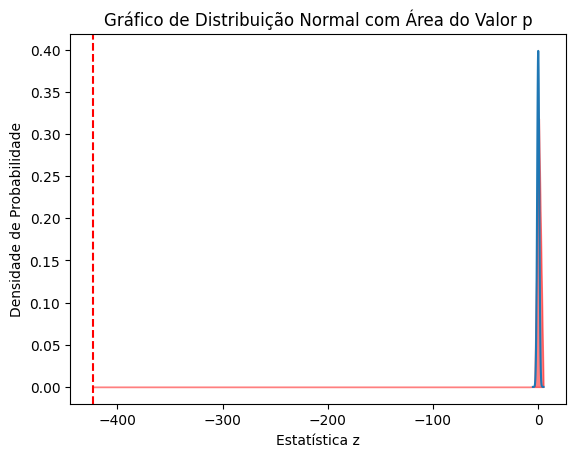

In [13]:
# Criar o gráfico da distribuição normal
x = np.linspace(-5, 5, 100)
y = norm.pdf(x)
plt.plot(x, y)

# Marcar a estatística z
plt.axvline(stat, color='red', linestyle='--')

# Sombrear a área do valor p
x_shade = np.linspace(stat, 5, 100)
y_shade = norm.pdf(x_shade)
plt.fill_between(x_shade, y_shade, color='red', alpha=0.5)

# Rotular os eixos
plt.xlabel("Estatística z")
plt.ylabel("Densidade de Probabilidade")
plt.title("Gráfico de Distribuição Normal com Área do Valor p")